In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('combined_data_1.txt' )
df

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03
...,...,...
2591364,2.0,2005-02-16
1791000,2.0,2005-02-10
512536,5.0,2005-07-27
988963,3.0,2005-12-20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24058262 entries, ('1488844', 3.0) to ('1704416', 3.0)
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   1:      object
dtypes: object(1)
memory usage: 318.0+ MB


In [4]:
# Reading dataset file
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
#not named---->we are naming the columns

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)
#3
#3.5----->float--->rating column



In [5]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [6]:
#To inspect the shape of the datset
dataset.shape



(24058263, 2)

In [7]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [8]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
movie_count = int(dataset.isnull().sum().iloc[1])
movie_count


4499

In [10]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [11]:
# get rating count

rating_count = int(dataset['Cust_Id'].count() - movie_count)

rating_count

24053764

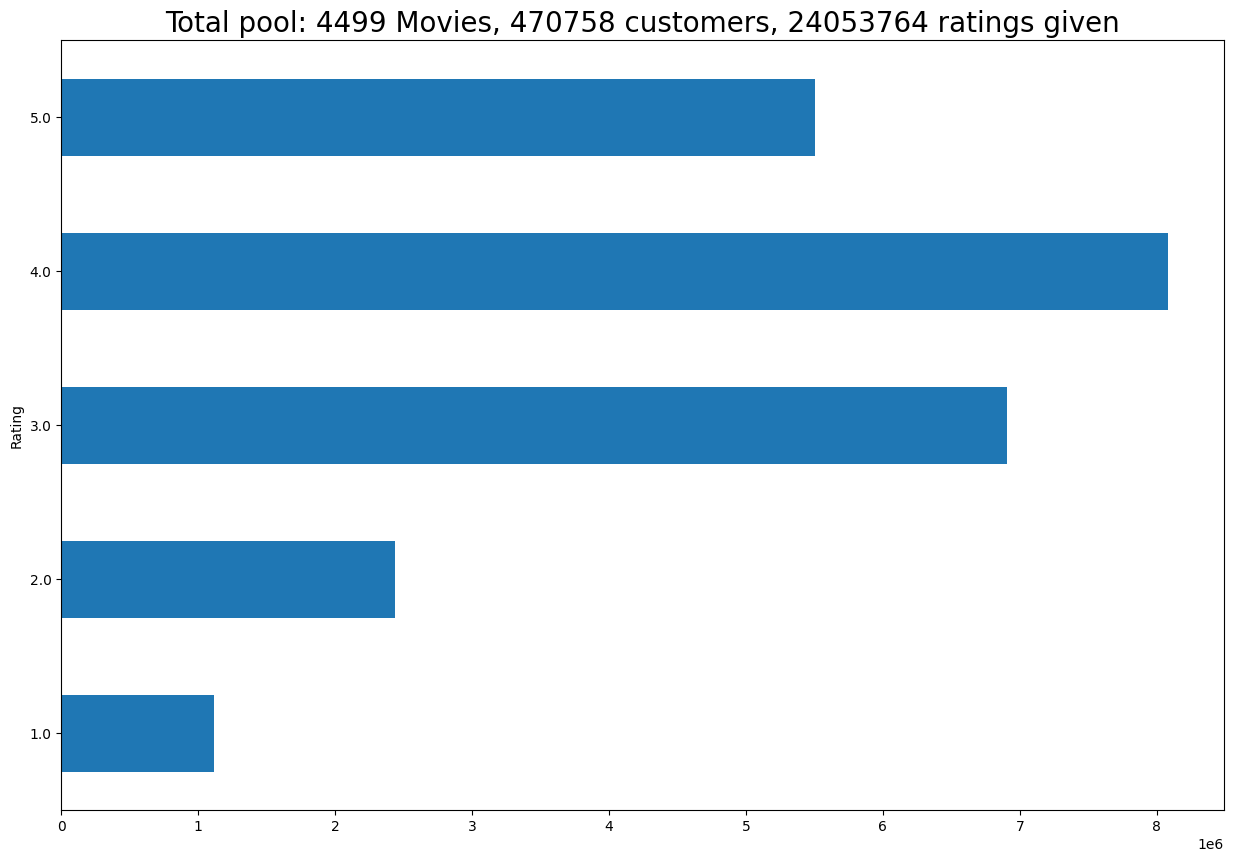

In [12]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.show()
#plt.axis('off')
#print--->print data  '' 'Total pool'

In [13]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [14]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(4499, 1)

In [15]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()



df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [16]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [17]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [18]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id,dtype=int)
    movie_np = np.array(movie_np, dtype=int)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id,dtype=int)
movie_np = np.array(movie_np, dtype=int)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [   1    1    1 ... 4499 4499 4499]
Length: 24053764


In [19]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [20]:
f = ['count','mean']
#count and mean

In [21]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [22]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [23]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (24053764, 3)


In [24]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (17337458, 3)


In [25]:

print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [26]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [27]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To load the movie_titles dataset

In [28]:
df_title = pd.read_csv('movie_titles _1_.csv', encoding="Latin-1", header=None, names=['Movie_Id', 'Year', 'Name'], on_bad_lines='skip')


In [29]:
df_title.set_index('Movie_Id', inplace = True)
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


To install the scikit-surprise library for implementing SVD

Run the following command in the Anaconda Prompt to install surprise package

In [30]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [31]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8576  0.8577  0.8578  0.8577  0.0001  
MAE (testset)     0.6666  0.6665  0.6668  0.6666  0.0001  
Fit time          244.17  253.88  237.98  245.34  6.54    
Test time         108.80  105.63  63.35   92.59   20.72   


{'test_rmse': array([0.85760817, 0.85772418, 0.85782388]),
 'test_mae': array([0.66656576, 0.66652138, 0.66678498]),
 'fit_time': (244.17183256149292, 253.8784739971161, 237.9828860759735),
 'test_time': (108.80004286766052, 105.63045358657837, 63.350517988204956)}

In [32]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

In [33]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                      Name  Estimate_Score
4270  2002.0            Curb Your Enthusiasm: Season 3        5.000000
3856  2004.0                        Nip/Tuck: Season 2        5.000000
711   2003.0                        The Wire: Season 1        5.000000
857   1954.0                             Seven Samurai        5.000000
173   1992.0                            Reservoir Dogs        5.000000
1659  1989.0                             Lonesome Dove        5.000000
1813  1956.0  Samurai Trilogy 3: Duel at Ganryu Island        5.000000
2067  1994.0                    The Simpsons: Season 6        4.975419
977   1961.0                                   Yojimbo        4.964192
3379  2004.0     Family Guy: Freakin' Sweet Collection        4.964063


In [34]:
import numpy as np
np.full((1,3),3)


array([[3, 3, 3]])